In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron:
    """Klasyfikator - perceptron.

    Parametry
    ------------
    eta : zmiennoprzecinkowy
        Współczynnik uczenia (w przedziale pomiędzy 0.0 a 1.0)
    n_iter : liczba całkowita
        Liczba przebiegów po zestawach uczących.
    random_state : liczba całkowita
      Ziarno generatora liczb losowych służący do losowego
      inicjowania wag.

    Atrybuty
    -----------
    w_ : jednowymiarowa tablica
        Wagi po dopasowaniu.
    errors_ : lista
        Liczba nieprawidłowych klasyfikacji (aktualizacji) w każdej epoce.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def net_input(self, X):
        """Oblicza pobudzenie całkowite"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Zwraca etykietę klas po obliczeniu funkcji skoku jednostkowego"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
    def fit(self, X, y):
        """Dopasowanie danych uczących.
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

#funkcja tail(bez parametru) plotuje 5 ostatnich wierszy tabeli        
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


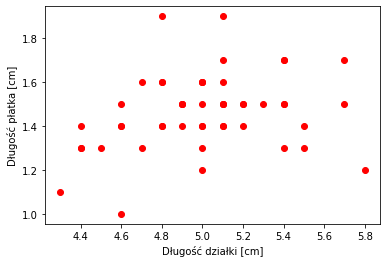

In [13]:
y =  df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100,[0,2]].values
#X[:50,0]-> slice do 50 elementu zerowej kolumny
#linijka pod-> x wykresu - > długość dzialki pierwszych 50 danych, y wykresu -> długość platka pierwszych 50 danych
plt.scatter(X[:50,0],X[:50,1],color = 'red', marker = 'o', label = 'Setosa')
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.show()

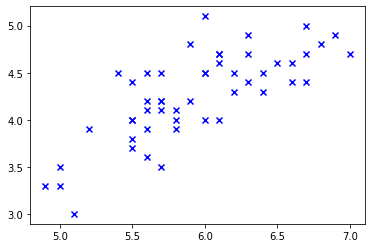

In [14]:
plt.scatter(X[50:100,0],X[50:100,1],color = 'blue', marker = 'x', label = 'Versicolor')
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.show()

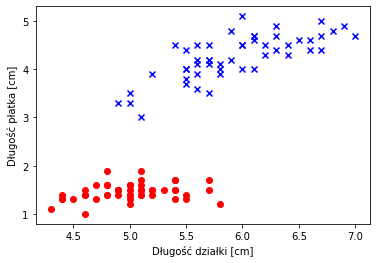

In [15]:
plt.scatter(X[:50,0],X[:50,1],color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color = 'blue', marker = 'x', label = 'Versicolor')
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.show()

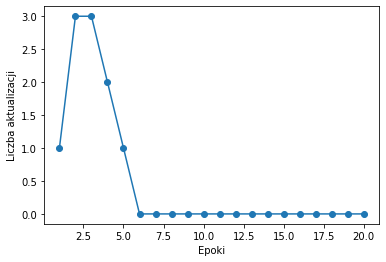

In [16]:
ppn = Perceptron(eta = 0.1,n_iter = 20)
ppn.fit(X,y)

plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Epoki')
plt.ylabel('Liczba aktualizacji')
plt.show()

In [19]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\Adam\AppData\Local\Temp\ipykernel_30792\211226911.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


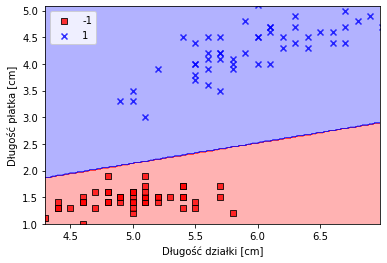

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')


#plt.savefig('rysunki/02_08.png', dpi=300)
plt.show()